## Titanic Dataset End-to-End Exploratory Data Analysis using Python

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load data on python

In [ ]:
df = pd.read_csv(r"Titanic.csv")

## 2. Print starting 5 rows and last 5 rows

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## 3. Shape of the data

In [ ]:
df.shape

(891, 12)

- There are 891 **rows** and 12 **columns**.

## 4. Print all columns name

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# Convert it to list format

df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

## 5. Find the data type of all the columns

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 6. Print information and summary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- 'Age' and 'Cabin' column has 'null' values.

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 7. Count Survived and show on pie chart

In [ ]:
df.Survived.nunique()

2

In [ ]:
df['Survived'].unique()

array([0, 1], dtype=int64)

- 1 means Survived
- 0 means Not Survived

In [ ]:
survival_count = df[df['Survived'] == 1].shape[0]
print('Count of survived passengers: ', survival_count)

Count of survived passengers:  342


In [ ]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

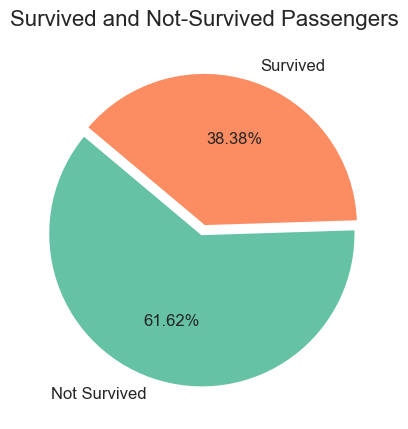

In [ ]:
var1 = df['Survived'].value_counts()

mylabels = ['Not Survived', 'Survived']
myexplodes = [0.05, 0]
mycolors = sns.color_palette("Set2")[0:2]  # Use matching palette colors

fig, ax = plt.subplots(figsize=(5, 5))

wedges, texts, autotexts = ax.pie(
    var1,
    labels=mylabels,
    explode=myexplodes,
    colors=mycolors,
    autopct='%1.2f%%',
    startangle=140,
    wedgeprops=dict(edgecolor='white', linewidth=2),
    textprops={'fontsize': 12}
)

ax.set_title("Survived and Not-Survived Passengers", fontsize=16)
plt.show()


## 8. Find out how many female passengers had travelled in first class and show on pie chart

In [ ]:
df_female = df[df['Sex'] == "female"]

In [ ]:
var2 = df_female['Pclass'].value_counts()
var2

Pclass
3    144
1     94
2     76
Name: count, dtype: int64

- Out of all females, 94 travelled in 1st Class.

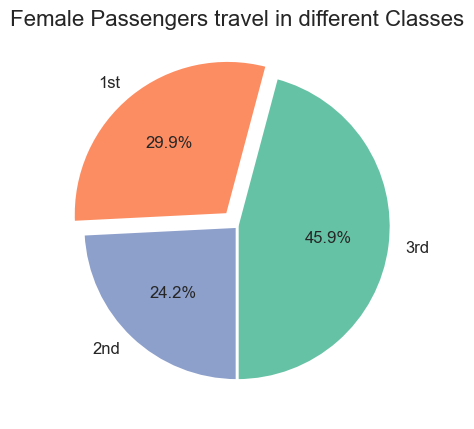

In [ ]:
mylabels = ['3rd', '1st', '2nd']
myexplods = (0, 0.1, 0)
mycolors = sns.color_palette("Set2")[0:3]

fig, ax = plt.subplots(figsize=(5, 5))

wedges, texts, autotexts = ax.pie(
    var2,
    labels=mylabels,
    explode=myexplods,
    colors=mycolors,
    autopct='%0.01f%%',
    startangle=270,
    wedgeprops=dict(edgecolor='white', linewidth=2),
    textprops={'fontsize': 12}
)

ax.set_title("Female Passengers travel in different Classes", fontsize=16)
plt.show()


## 9. Find out how many female passengers had Survived and her age <30, show on pie chart and bar graph

In [ ]:
count = df_female[(df_female['Age'] <30) & (df_female['Survived'])==1].shape[0]
print("Count of female passengers who survived and age<30: ", count)

Count of female passengers who survived and age<30:  105


In [ ]:
df_f_a = df[(df['Sex']=='female') & (df['Age']<30)]

In [ ]:
var3 = df_f_a['Survived'].value_counts()
var3

Survived
1    105
0     42
Name: count, dtype: int64

- Female with age<30, 105 survived and 42 not-survived.
- Insight, young females were given priority.

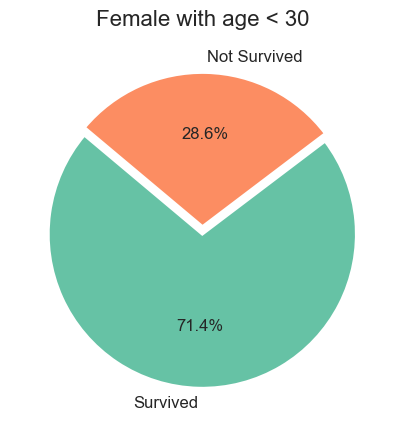

In [ ]:
mylabels = ['Survived', 'Not Survived']
myexplods = (0.05, 0)
mycolors = sns.color_palette("Set2")[0:2]

fig, ax = plt.subplots(figsize=(5, 5))

wedges, texts, autotexts = ax.pie(
    var3,
    labels=mylabels,
    explode=myexplods,
    colors=mycolors,
    autopct='%0.01f%%',
    startangle=140,
    wedgeprops=dict(edgecolor='white', linewidth=2),
    textprops={'fontsize': 12}
)

ax.set_title("Female with age < 30", fontsize=16)
plt.show()


## 10. Find out how many male passengers had Survived and his age >40, show on pie chart 

In [ ]:
df_m_a = df[(df['Sex'] == 'male') & (df['Age'] > 40)]
var4 = df_m_a['Survived'].value_counts()
var4

Survived
0    84
1    18
Name: count, dtype: int64

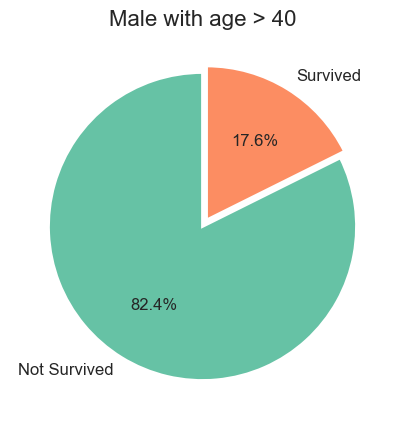

In [ ]:
mylabels = ['Not Survived', 'Survived']
myexplods = (0, 0.05)
mycolors = sns.color_palette("Set2")[0:2]

fig, ax = plt.subplots(figsize=(5, 5))

wedges, texts, autotexts = ax.pie(
    var4,
    labels=mylabels,
    explode=myexplods,
    colors=mycolors,
    autopct='%0.01f%%',
    startangle=90,
    wedgeprops=dict(edgecolor='white', linewidth=2),
    textprops={'fontsize': 12}
)

ax.set_title("Male with age > 40", fontsize=16)
plt.show()


## 11.  Show age with 20 bins

In [ ]:
# For bins, we've to use Histogram.
# Age is a continuous column, so we can use Histogram Chart to know it's distribution

df.Age.isnull().sum()

177

- So, we've 177 **NaN** records in `Age` column. We will deal with those later.

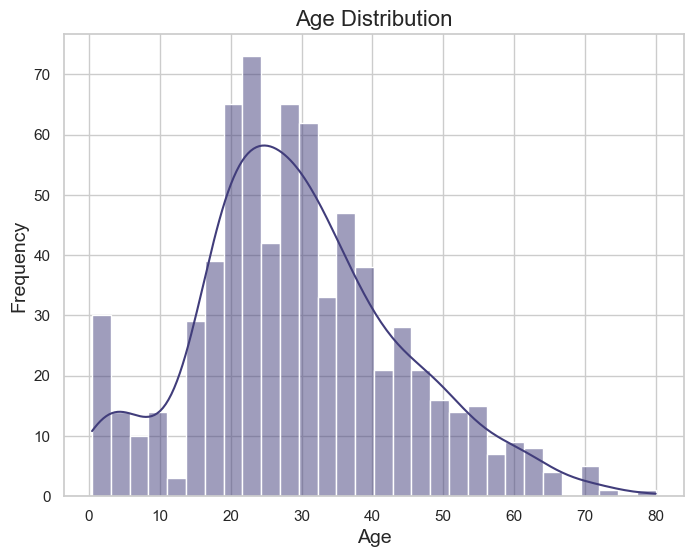

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df.Age, bins=30, kde=True, color=sns.color_palette("mako")[1])
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


- By default, the bins size is 10 (total no. of vertical boxes)

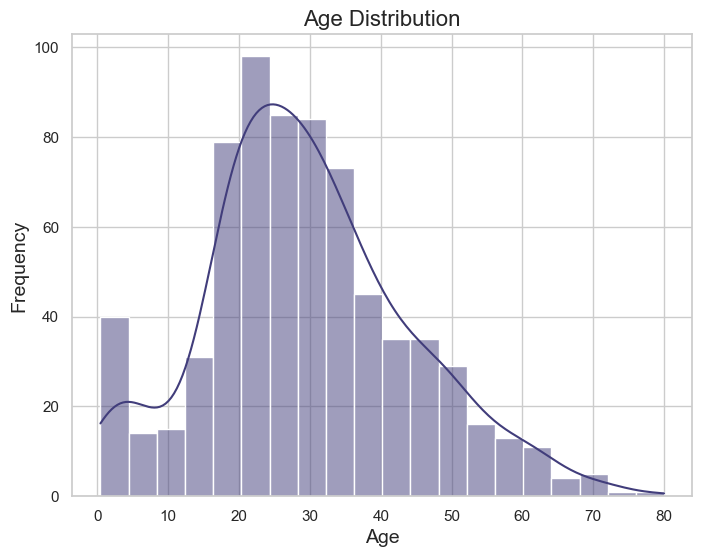

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df.Age, bins=20, kde=True, color=sns.color_palette("mako")[1])
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


- Now, the number of bins are 20. But tick marks on x-axis is off. How to correct it?

In [ ]:
# Max value of age is 80. Let's take it as 85 to cover for the outliers.
# 85/20 = 4 (should be integer)

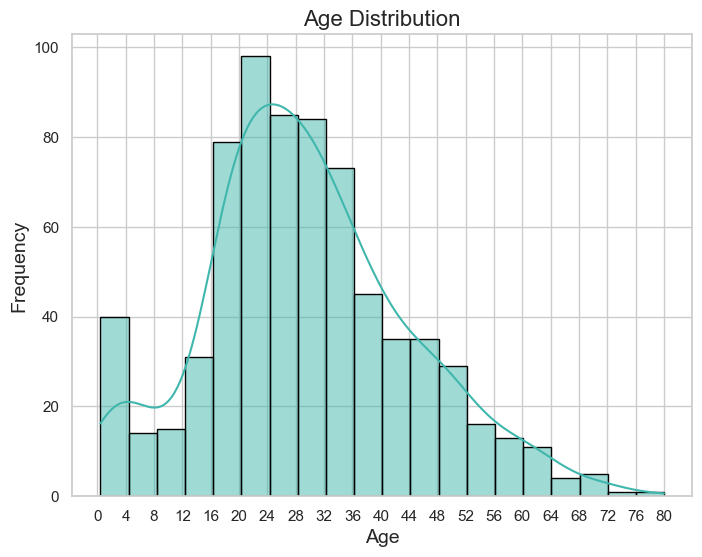

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df.Age, bins=20, kde=True, color=sns.color_palette("mako")[4], edgecolor='black')
plt.xticks(np.arange(0, 84, 4))
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


- Great, but we can't see the starting value of the Age. For that, we've to find bin_center.

In [ ]:
bins[:-1], bins[1:]

(array([ 1.  ,  4.65,  8.3 , 11.95, 15.6 , 19.25, 22.9 , 26.55, 30.2 ,
        33.85, 37.5 , 41.15, 44.8 , 48.45, 52.1 , 55.75, 59.4 , 63.05,
        66.7 , 70.35]),
 array([ 4.65,  8.3 , 11.95, 15.6 , 19.25, 22.9 , 26.55, 30.2 , 33.85,
        37.5 , 41.15, 44.8 , 48.45, 52.1 , 55.75, 59.4 , 63.05, 66.7 ,
        70.35, 74.  ]))

In [ ]:
# take the average of these two values to find the actual values

(bins[:-1] + bins[1:])/2

array([ 2.825,  6.475, 10.125, 13.775, 17.425, 21.075, 24.725, 28.375,
       32.025, 35.675, 39.325, 42.975, 46.625, 50.275, 53.925, 57.575,
       61.225, 64.875, 68.525, 72.175])

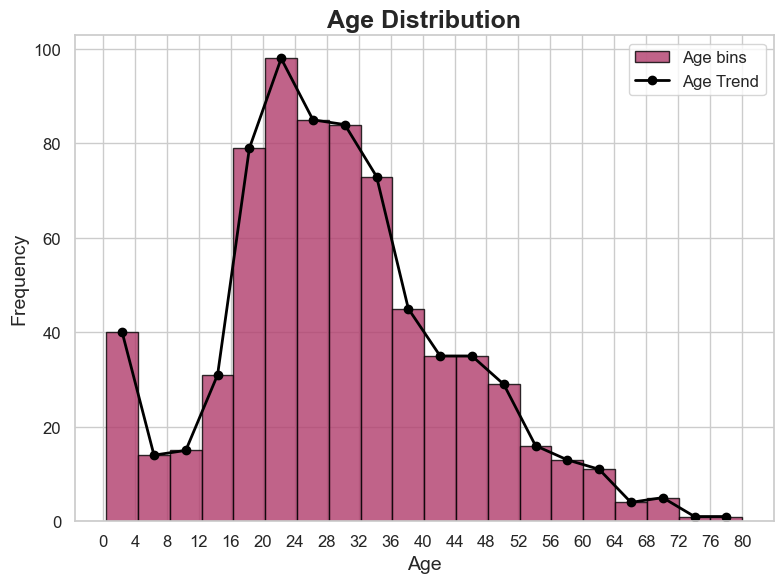

In [ ]:
plt.figure(figsize=(8, 6))
counts, bins, _ = plt.hist(df.Age, bins=20, color=sns.color_palette("flare")[3], edgecolor='black', alpha=0.8, label='Age bins')
bin_centers = (bins[:-1] + bins[1:])/2

plt.plot(bin_centers, counts, marker='o', color='black', linewidth=2, markersize=6, label='Age Trend')

plt.xticks(np.arange(0, 84, 4), fontsize=12)
plt.yticks(fontsize=12)
plt.title('Age Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(frameon=True, fontsize=12)
plt.tight_layout()
plt.show()


## 12.  Show age frequency with survived and not survived (Histogram)

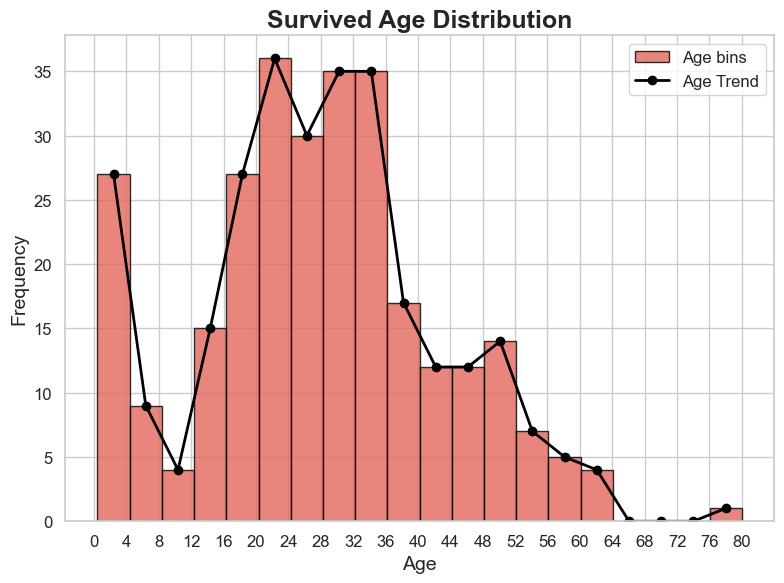

In [ ]:
df_sur_age = df[df['Survived'] == 1].Age

plt.figure(figsize=(8, 6))
counts, bins, _ = plt.hist(df_sur_age, bins=20, color=sns.color_palette("flare")[1], edgecolor='black', alpha=0.8, label='Age bins')
bin_centers = (bins[:-1] + bins[1:])/2

plt.plot(bin_centers, counts, marker='o', color='black', linewidth=2, markersize=6, label='Age Trend')

plt.xticks(np.arange(0, 84, 4), fontsize=12)
plt.yticks(fontsize=12)
plt.title('Survived Age Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(frameon=True, fontsize=12)
plt.tight_layout()
plt.show()


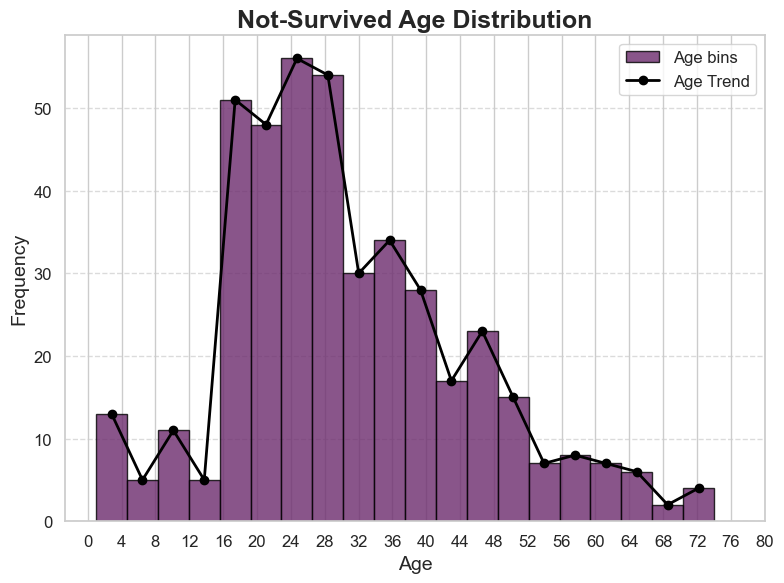

In [ ]:
df_not_sur_age = df[df['Survived'] == 0].Age

plt.figure(figsize=(8, 6))
counts, bins, _ = plt.hist(df_not_sur_age, bins=20, color=sns.color_palette("flare")[5], edgecolor='black', alpha=0.8, label='Age bins')
bin_centers = (bins[:-1] + bins[1:])/2

plt.plot(bin_centers, counts, marker='o', color='black', linewidth=2, markersize=6, label='Age Trend')

plt.xticks(np.arange(0, 84, 4), fontsize=12)
plt.yticks(fontsize=12)
plt.title('Not-Survived Age Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(frameon=True, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- It is clear that by making two separate graph for Survivied and Not-Survived, it became difficult to compare.

## 13.  Show Bar graph for Survived with male, female, class

In [ ]:
df_sur = df[df['Survived'] == 1]

In [ ]:
df_sur['Sex'].value_counts()

Sex
female    233
male      109
Name: count, dtype: int64

In [ ]:
df_sur['Pclass'].value_counts()

Pclass
1    136
3    119
2     87
Name: count, dtype: int64

C:\Users\hashi\AppData\Local\Temp\ipykernel_13336\4237160181.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Pclass", data=df_sur, palette=sns.color_palette("pastel"))
C:\Users\hashi\AppData\Local\Temp\ipykernel_13336\4237160181.py:1: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(x="Pclass", data=df_sur, palette=sns.color_palette("pastel"))


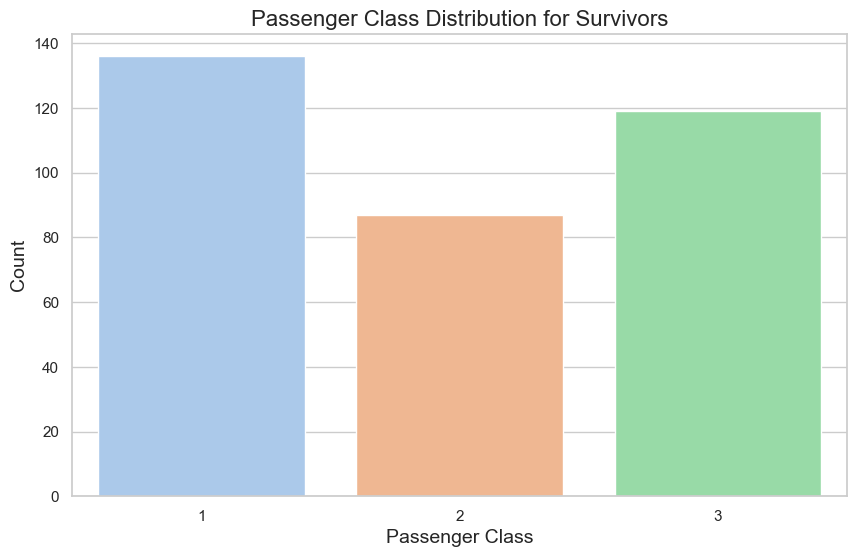

In [ ]:
sns.countplot(x="Pclass", data=df_sur, palette=sns.color_palette("pastel"))
plt.title('Passenger Class Distribution for Survivors')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()


C:\Users\hashi\AppData\Local\Temp\ipykernel_13336\1334479998.py:1: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x="Pclass", data=df_sur, hue='Sex', palette=sns.color_palette("pastel"))


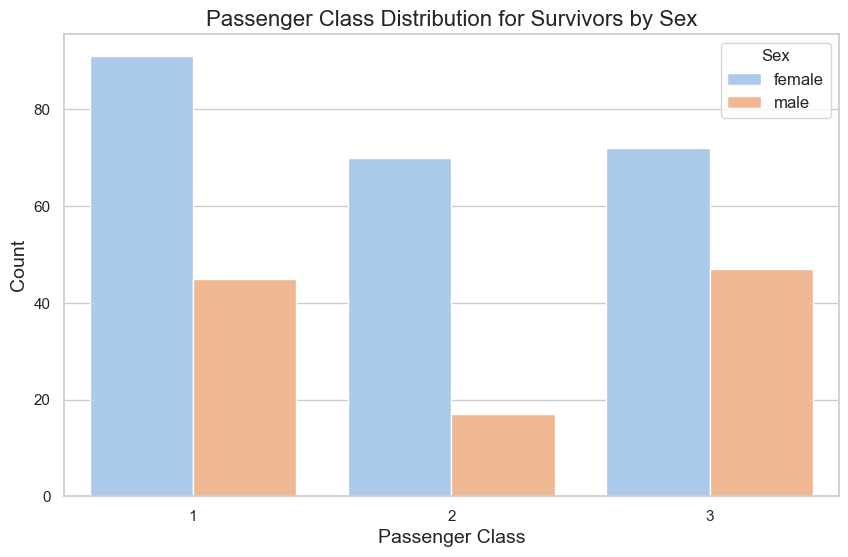

In [ ]:
sns.countplot(x="Pclass", data=df_sur, hue='Sex', palette=sns.color_palette("pastel"))
plt.title('Passenger Class Distribution for Survivors by Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()


## 14.  How many passengers are travelled in different classes show in Bar graph

In [ ]:
df_class = df.Pclass.value_counts()
df_class

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

#### Now, how to extract values for x-axis and y-axis from this dataframe

In [ ]:
x = df_class.index
x

Index([3, 1, 2], dtype='int64', name='Pclass')

In [ ]:
# convert dataframe to list
values = list(df_class)

In [ ]:
# convert dataframe to dictionary
data = dict(df_class)
data

{3: 491, 1: 216, 2: 184}

In [ ]:
x = data.keys()
x

dict_keys([3, 1, 2])

In [ ]:
count = data.values()
count

dict_values([491, 216, 184])

In [ ]:
# Summary, for Bar graph, we've to provide x and y values

data = dict(df_class)
x = data.keys()
count = data.values()

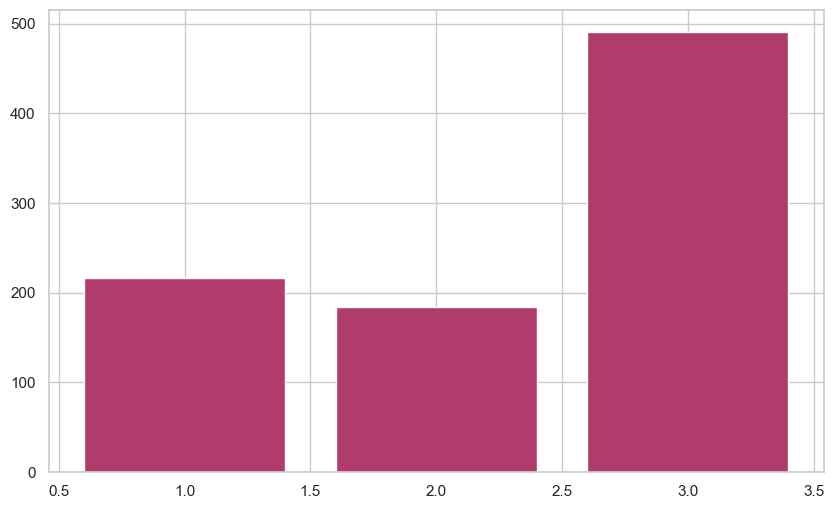

In [ ]:
plt.bar(x, count, color=sns.color_palette("flare")[3])
plt.show()


In [ ]:
val = []

for i in x:
    if i == 1:
        val.append("1st Class")
    elif i == 2:
        val.append("2nd Class")
    elif i == 3:
        val.append("3rd Class")
        
val

['3rd Class', '1st Class', '2nd Class']

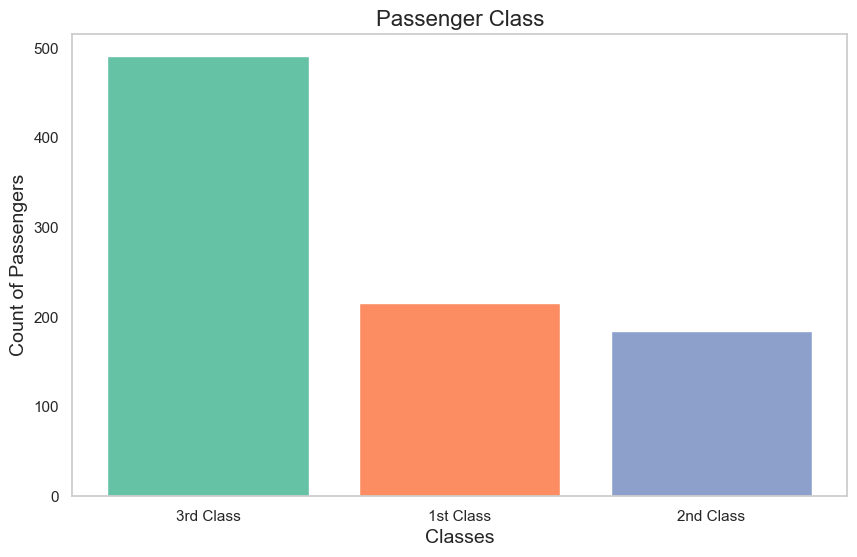

In [ ]:
plt.bar(val, count, color=sns.color_palette("Set2"))

plt.title('Passenger Class')
plt.xlabel('Classes')
plt.ylabel('Count of Passengers')
plt.grid()
plt.show()


## 15.  How many passengers are survived with class wise and show in Bar graph

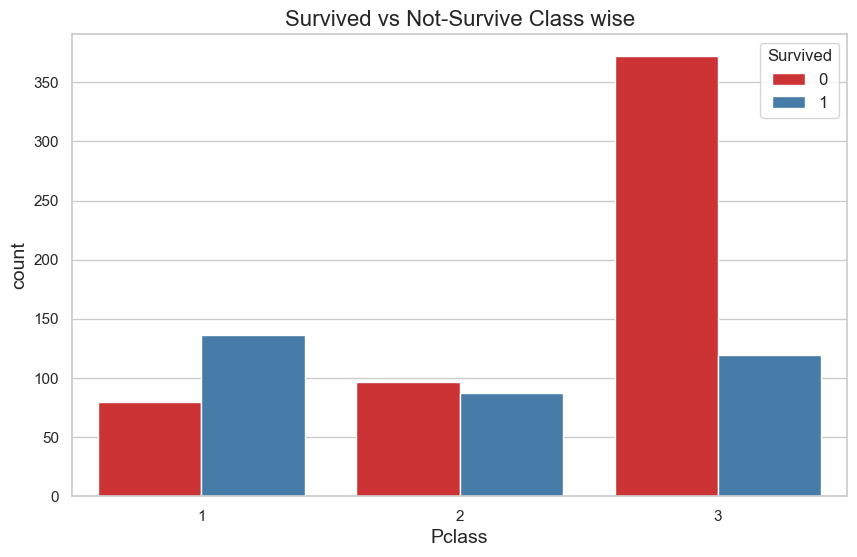

In [ ]:
sns.countplot(x='Pclass', data=df, hue='Survived', palette='Set1')

plt.title("Survived vs Not-Survive Class wise")
plt.show()


## 16.  Show Question-13 & Question-14 in subplot

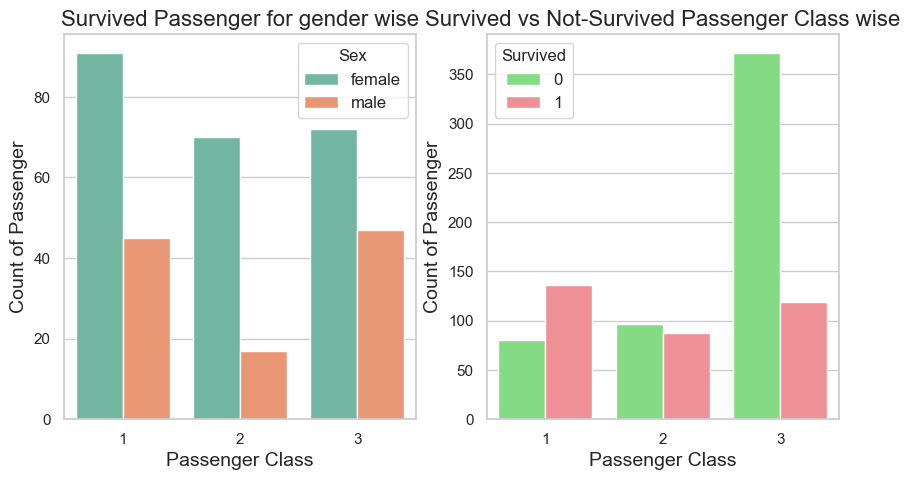

In [ ]:
# We require two plots side-by-side, meaning in a single row. one for survived and second one for not-survived
fig, axs = plt.subplots(1,2, figsize=(10, 5))  

sns.countplot(x='Pclass', data=df_sur, hue='Sex', ax=axs[0])
sns.countplot(x='Pclass', data=df, hue='Survived', ax=axs[1], palette=["#76EA74", "#FF8088"])

axs[0].set_xlabel('Passenger Class')
axs[1].set_xlabel('Passenger Class')

axs[0].set_ylabel('Count of Passenger')
axs[1].set_ylabel('Count of Passenger')

axs[0].set_title("Survived Passenger for gender wise")
axs[1].set_title("Survived vs Not-Survived Passenger Class wise")

plt.show()

## 17.  Show Bar graph for Survived with 3rd class male, 1st class female

In [ ]:
var1 = df_sur[df_sur.Sex == 'female']
var2 = df_sur[df_sur.Sex == 'male']

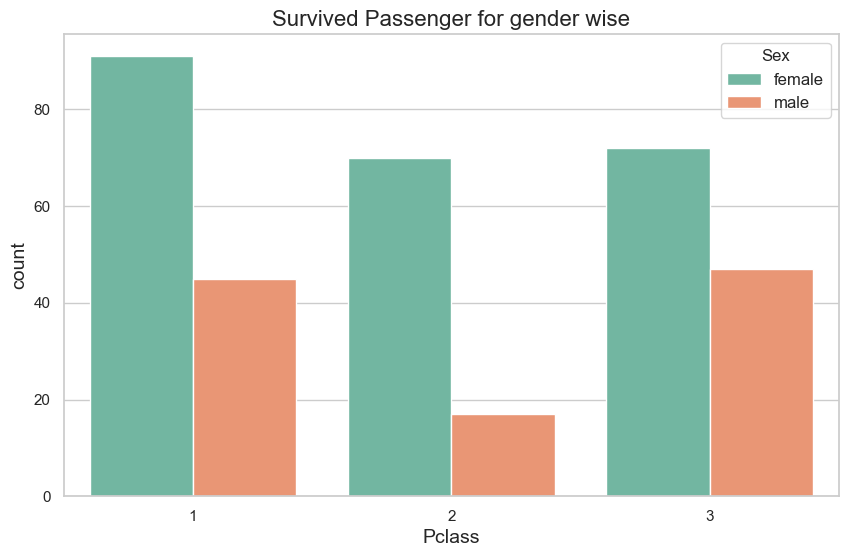

In [ ]:
# Custom color scheme: teal and coral
sns.countplot(df_sur, x='Pclass', hue='Sex')
plt.title("Survived Passenger for gender wise")
plt.show()


- Females in all classes were given priority.

In [ ]:
df[(df.Pclass == 3) & (df.Sex == "male")].Survived.value_counts()

Survived
0    300
1     47
Name: count, dtype: int64

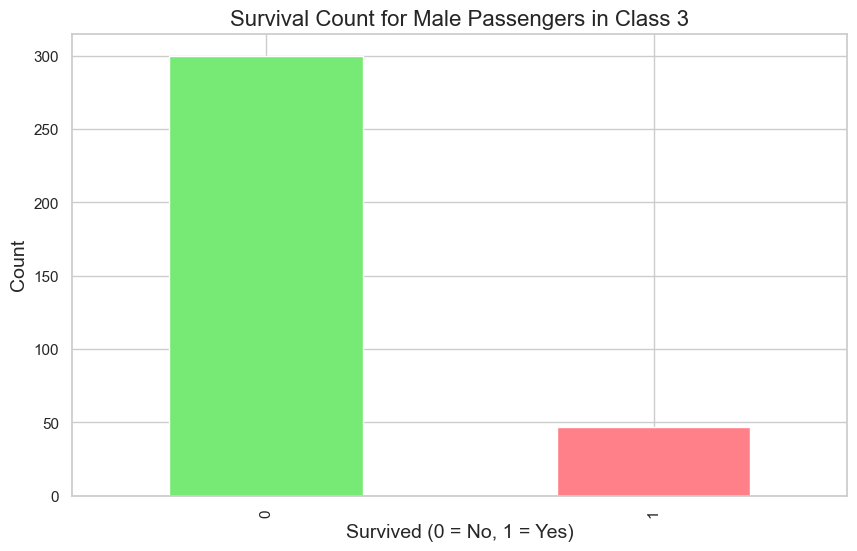

In [ ]:
df[(df.Pclass == 3) & (df.Sex == "male")].Survived.value_counts().plot(
    kind='bar',
    color=["#76EA74", "#FF8088"]
)
plt.title("Survival Count for Male Passengers in Class 3")
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


In [ ]:
df[(df.Pclass == 1) & (df.Sex == "female")].Survived.value_counts()

Survived
1    91
0     3
Name: count, dtype: int64

<Axes: xlabel='Survived'>

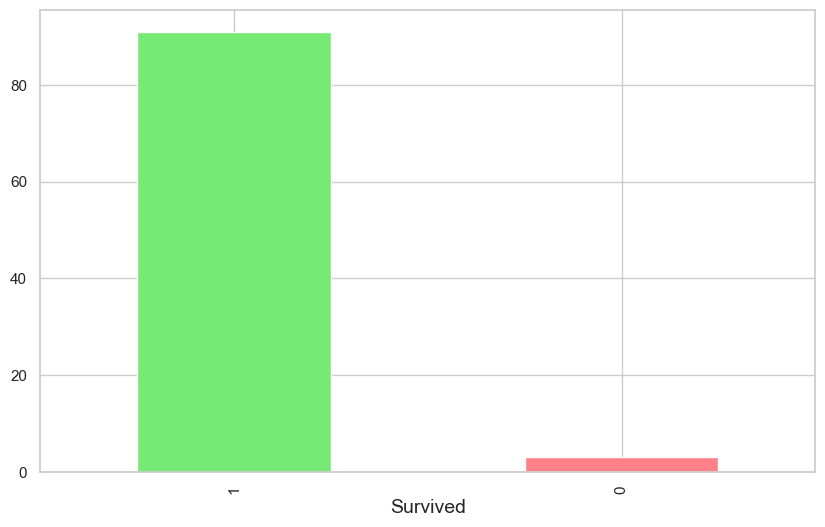

In [ ]:
df[(df.Pclass == 1) & (df.Sex == "female")].Survived.value_counts().plot(kind='bar', color=["#76EA74", "#FF8088"])

- Clearly, the survival rate in 1st Class is better.
- Let's draw both of these graph in Sub-plot for better comparison. (Question 18th)

## 18.  How many passengers are survived / not survived and they are 1st class female

In [ ]:
df[(df.Pclass == 1) & (df.Sex == "female")].Survived.value_counts()

Survived
1    91
0     3
Name: count, dtype: int64

In [ ]:
# Cross-Tab

pd.crosstab(df['Pclass'],df['Sex'])

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [ ]:
pd.crosstab(df['Pclass'],df['Sex'], margins=True)

Sex,female,male,All
Pclass,,,
1,94,122,216
2,76,108,184
3,144,347,491
All,314,577,891


### Subplots

In [ ]:
df[df.Survived == 1].Sex.value_counts()

Sex
female    233
male      109
Name: count, dtype: int64

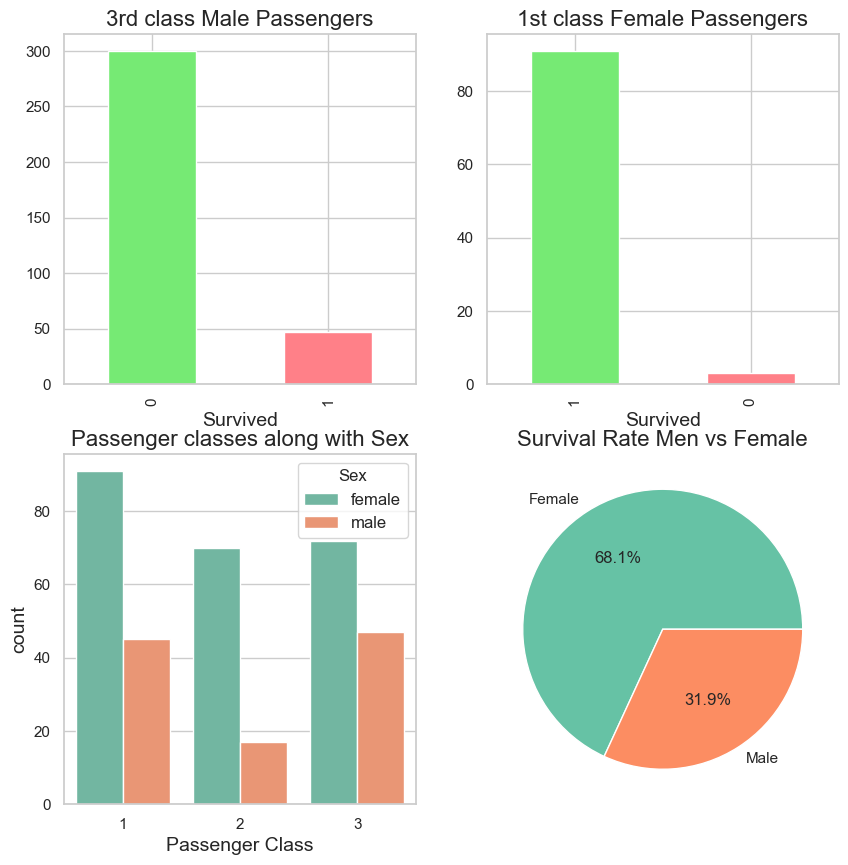

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(10,10))

var1 = df[(df.Pclass == 3) & (df.Sex == "male")].Survived.value_counts()
var1.plot(kind='bar', color=["#76EA74", "#FF8088"], ax = axs[0][0])
axs[0,0].set_title("3rd class Male Passengers")

var2 = df[(df.Pclass == 1) & (df.Sex == "female")].Survived.value_counts()
var2.plot(kind="bar", color=["#76EA74", "#FF8088"], ax = axs[0][1])
axs[0,1].set_title("1st class Female Passengers")

sns.countplot(x='Pclass', hue='Sex', data=df[df.Survived == 1], ax=axs[1,0])
axs[1,0].set_title('Passenger classes along with Sex')
axs[1,0].set_xlabel('Passenger Class')

axs[1,1].pie(df[df.Survived == 1].Sex.value_counts(), autopct='%0.01f%%', labels=['Female', 'Male'])
axs[1,1].set_title('Survival Rate Men vs Female')

plt.show()

- First Class Passengers and Female Passengers were given more priority.

## 19.   Map the Sex column male = 1, female = 0

In [ ]:
# As 'Sex' column is an Categorical column, we can't use it as it is for our model. Therefore, we've to convert it to 

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Correlation

df[['Survived', 'Pclass', 'Age']].corr()

,Survived,Pclass,Age
Survived,1.000000,-0.338481,-0.077221
Pclass,-0.338481,1.000000,-0.369226
Age,-0.077221,-0.369226,1.000000


In [ ]:
# Why female to 0 and male to 1
# Because of alphabetical order female comes first, so given 0.

df['Sex'].map({'male':1, 'female':0})

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

### Lable Encoder

It assigned alphabetically

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

- If we use encode, then {C:0, Q:1, S:2} and nan will be ignored

In [ ]:
df['Embarked'] = le.fit_transform(df["Embarked"])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,0


## 20.   Find Null values

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

- Due to Encoder, 2 Nan values from Embarked column have been ignored.

In [ ]:
df = pd.read_csv("Titanic.csv")
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 21.   Replace Null value to Median value

In [ ]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


#### `From the analysis, till now, we know that children and female were given priority.`

In [ ]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

- min age was 4 months
- average is 29 and median is 28. Most of the people are young. So, those who survive belongs to less age.

In [ ]:
df.Age.median()

28.0

In [ ]:
df["Age"] = df.Age.fillna(df.Age.median())
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 22.   Drop unwanted columns

In [ ]:
cols = ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

In [ ]:
final_df = df[cols]

In [ ]:
final_df.Sex = df[cols].Sex.map({"male":1, "female":0})

C:\Users\hashi\AppData\Local\Temp\ipykernel_13336\2650738837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.Sex = df[cols].Sex.map({"male":1, "female":0})
